## North American Industry Classification System (NAICS) Time Series Analysis

The North American Industry Classification System (NAICS) is an industry classification system developed by the statistical agencies of Canada, Mexico and the United States. NAICS is designed to provide common definitions of the industrial structure of the three countries and a common statistical framework to facilitate the analysis of the three economies. The NAICS structure is hierarchical with a six-digit code numbering system adopted, of which the first five digits are used to describe the NAICS levels that will be used by the three countries (i.e. Canada, Mexico and the United States) to produce comparable data. The first two digits designate the sector, the third digit designates the subsector, the fourth digit designates the industry group and the fifth digit designates the industry. The sixth digit is used to designate national industries. A zero as the sixth digit indicates that there is no further national detail.

### Description of the File used for the analysis
As said earlier, the hierarchical structure of  the NAICS defines industries at different levels of aggregation with highest aggregate been a 2-digit NAICS industry (e.g., 23 - Construction) which is then composed of some 3-digit NAICS industries (236 - Construction of buildings, 237 - Heavy and civil engineering construction, and a few more 3-digit NAICS industries). Similarly, a 3-digit NAICS industry (e.g., 236 - Construction of buildings), is composed of 4-digit NAICS industries (2361 - Residential building construction and 2362 - Non-residential building construction). The above example is top-down approach while down-top approach will be the smaller industries with 4-digit NAICS making up a 3-digit NAICS industry which in turn make a 2-digit NAICS industry. 

For more information can be found at https://www.statcan.gc.ca/eng/subjects/standard/naics/2017/index on the files and datasets used in the analysis.

### Description of the Datasets Used
The file containing the datasets used in this time series analysis is obtained from https://wixlabs-file-sharing.appspot.com. The zipped files consist of 15 CSV files beginning with Real Time Remote Access (RTRA). These files contain employment data by industry at different level of aggregation; 2-digit NAICS, 3-digit NAICS, and 4-digit NAICS. The source of the data is from Real Time Remote Access (RTRA) data from the Labour Force Survey (LFS) by Statistics Canada. Below is the description of the column names as used in each dataset (CSV file):
1. SYEAR: Survey Year
2. SMTH: Survey Month
3. NAICS: Industry name and associated NAICS code in the bracket
4. _EMPLOYMENT_: Number of Employment offered in the industry aggregate 

Each level of aggregation (i.e.2-digit NAICS, 3-digit NAICS, and 4-digit NAICS) has survey data from 1997 to 2020 segregated into 1997-1999, 2000-2005, 2006-2010, 2011-2015 and 2016-2020 with 2020 data yet not available during the time of this analysis.

###  IMPORT  DATASET  

As mentioned earlier, as the data are survey data, they are separated into several year bands for each level of aggregation. Therefore, the data from each level of aggregation are imported and concatenated into a single data frame for exploratory data analysis (EDA).

In [1]:
#import the necessary packages
#import pandas for data manipulation and wrangling using its DataFrame
import pandas as pd 
#import numpy for mathematical data modeling
import numpy as np
#import glob for filename pattern matching
from glob import glob
#import matplotlib for data visualization
import matplotlib.pyplot as plt
#import seaborn for data visualization
import seaborn as sns
%matplotlib inline

#Set the style of the Seaborn Diagrams
sns.set(style="darkgrid")

#Enarge the size of graphs in the Notebook
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [2]:
# Save all the files into their respective variable
# Save all files with 2 NAICS code to a varaible
filename_2NAICS = glob("RTRA_Employ_2NAICS_*.csv") 
# Read 2 NAICS code files into varaible
list_2NAICS = [pd.read_csv(file,dtype={"SYEAR":str,"SMTH":str}) for file in filename_2NAICS] 

# Save all files with 3 NAICS code to a varaible
filename_3NAICS = glob("RTRA_Employ_3NAICS_*.csv")
# Read 3 NAICS code files into varaible
list_3NAICS = [pd.read_csv(file,dtype={"SYEAR":str,"SMTH":str}) for file in filename_3NAICS] 

# Save all files with 4 NAICS code to a varaible
filename_4NAICS = glob("RTRA_Employ_4NAICS_*.csv") 
# Read 4 NAICS code files into varaible
list_4NAICS = [pd.read_csv(file,dtype={"SYEAR":str,"SMTH":str}) for file in filename_4NAICS] 

First, each aggregate level data is saved to a file using the glob package which allows for filename pattern matching using various wildcards. It came handy in this case with less code for readability and understanding. Then list comprehension is used to read each CSV file into a list of dataframes for each aggregate level because we have many data as RTRA_Employ_3NAICS following with a code. The datatypes of the "SYEAR" and "SMTH" columns are converted to object (i.e. string)

For convenience, code maintenance and reusability, a function is used to concatenate the list of dataframes into a single dataframe for the EDA.

######  DEFINITIONS OF FUNCTIONS TO USE

In [3]:
def combine_dataframes(list_of_DataFrames):
    """Convert list of DataFrames into a single DataFrame, and add the month 
        ending day and a date columns. Set the added date column as the index
        and sort.
    Args:
        list of DataFrames to be converted.
        
    Return:
        A single sorted DataFrame with month end day column and a DATE index added
    """
    #Concatenate the list of DataFrames into a single DataFrame
    converted_df = pd.concat(list_of_DataFrames,ignore_index=True)
    #Dictionary with the month as the key and last day of the month as value
    days = {"1":"31","2":"28","3":"31","4":"30","5":"31","6":"30","7":"31","8":"31"\
            ,"9":"30","10":"31","11":"30","12":"31"}
    day = []
    #Iterating through the Dataframe and appending DAY and DATE columns to it, taking  
    #into acoount the last of the month especially leap years
    for i in range(len(converted_df)):
        #Save the month column to a variable
        month = converted_df.loc[i,"SMTH"]
        #Save the year column to a variable
        year = converted_df.loc[i,"SYEAR"]
        #If the current year is a leap year and the month is February ("2")
        if (year =="2000" or year =="2004" or year =="2008" or year =="2012"\
            or year =="2016" or year =="2020") and month is "2":
            #Assign the value '29' to the _day variable for leap year of the month February
            _day = "29"
        else:
            #Assign the value '28' to the _day variable for non-leap year of the month February
            _day = days[month]
        #Append the variable '_day' to the list variable day
        day.append(_day)
    #The list variable is broadcast to the DAY column created for the DataFrame
    converted_df["DAY"] = day
    #New column is added to the DataFrame which consists of the last day of the month, month and year
    converted_df["DATE"] = converted_df.DAY + "-" + converted_df.SMTH + "-" + converted_df.SYEAR
    #The 'DATE' column is converted to datetime object for time series analysis
    converted_df["DATE"] = pd.to_datetime(converted_df["DATE"])
    #The 'DATE' column is set as the index of the DataFrame for convienence
    converted_df=converted_df.set_index('DATE')
    #Sort the index in ascending order to start from 1997 to 2019
    converted_df = converted_df.sort_index()
    #converted_sorted_df = converted_df.sort_values(by='DATE').reset_index(drop=True)
    return converted_df

def split_NAICS(dataframe):
    """ Convert the NAICS column of the DataFrame into two columns: NAICS name and NAICS code 
    Args:
        DataFrame to have its 'NAICS' columns split.
        
    Return:
        DataFrame with 'NAICS' column dropped and two new columns added (i.e. 'NAICS_code' and 'NAICS_name')
        obtained from splitting the code from the NAICS names
    """
    #Split on '[' and save to a new column 'splitted_NAICS'
    dataframe['splitted_NAICS'] = dataframe.NAICS.str.split('[')
    #Save the first element in the list to a variable as the 'NAICS_name' and add it as a new column
    dataframe['NAICS_name'] = dataframe['splitted_NAICS'].str.get(0)
    #Strip off the ']' from the second element of the list and save to a column in the DataFrame as 'NAICS_code'
    dataframe['NAICS_code'] = dataframe['splitted_NAICS'].str.get(1).str.strip(']')
    #Drop the 'splitted_NAICS' column created and the NAICS column along
    dataframe.drop(['splitted_NAICS','NAICS'],axis=1,inplace=True)
    return dataframe

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-2c6a8bffc177>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or year =="2016" or year =="2020") and month is "2":


In [4]:
"""The function definitions are used to achieve what they were defined for"""
#Read all dataframes of each NAICS code into a single DataFrame
naics_2_code_employ_data = combine_dataframes(list_2NAICS)
naics_3_code_employ_data = combine_dataframes(list_3NAICS)
naics_4_code_employ_data = combine_dataframes(list_4NAICS)

#Split the NAICS column of the combined DataFrame into NAICS name and their respective codes.
naics_2_code_employ_data = split_NAICS(naics_2_code_employ_data)
naics_3_code_employ_data = split_NAICS(naics_3_code_employ_data)
#Display the a few rows of each aggregate level
display(naics_2_code_employ_data.head(3),naics_3_code_employ_data.head(3),naics_4_code_employ_data.head(3))

,SYEAR,SMTH,_EMPLOYMENT_,DAY,NAICS_name,NAICS_code
DATE,,,,,,
1997-01-31,1997,1,72000,31,Wholesale trade,41
1997-01-31,1997,1,9750,31,Utilities,22
1997-01-31,1997,1,107000,31,Transportation and warehousing,48-49


,SYEAR,SMTH,_EMPLOYMENT_,DAY,NAICS_name,NAICS_code
DATE,,,,,,
1997-01-31,1997,1,48000,31,Wood product manufacturing,321
1997-01-31,1997,1,9750,31,Private households,814
1997-01-31,1997,1,10750,31,Printing and related support activities,323


,SYEAR,SMTH,NAICS,_EMPLOYMENT_,DAY
DATE,,,,,
1997-01-31,1997,1,9191,0,31
1997-01-31,1997,1,5171,11000,31
1997-01-31,1997,1,5151,4750,31


### EDA

The 'NAICS' column in the "naics_4_employ_data" is inconsistent with the column names of the other dataframes, therefore it will be renamed for consistency.

In [5]:
#Change the 'NAICS' column of the 4NAICS to NAICS_code for consistency
naics_4_code_employ_data = naics_4_code_employ_data.rename(columns={"NAICS":"NAICS_code"})
print(naics_4_code_employ_data.columns)

Index(['SYEAR', 'SMTH', 'NAICS_code', '_EMPLOYMENT_', 'DAY'], dtype='object')


In [6]:
#Check for missing values in the 2-digit NAICS data
naics_2_code_employ_data.isna().sum()

SYEAR           0
SMTH            0
_EMPLOYMENT_    0
DAY             0
NAICS_name      0
NAICS_code      0
dtype: int64

In [7]:
#Check for missing values in the 4-digit NAICS data
naics_4_code_employ_data.isna().sum()

SYEAR           0
SMTH            0
NAICS_code      0
_EMPLOYMENT_    0
DAY             0
dtype: int64

In [8]:
#Check for missing values in the 3-digit NAICS data
naics_3_code_employ_data.isna().sum()

SYEAR             0
SMTH              0
_EMPLOYMENT_      0
DAY               0
NAICS_name        0
NAICS_code      552
dtype: int64

The output of naics_3_code_employ_data showed 552 entries with NaN (i.e. missing values) for the NAICS_code column but naics_2_code_employ_data and naics_4_code_employ_data are without missing values. Therefore, further analysis on the data would reveal the course of the missing value.

In [9]:
#Check which NAICS is having null or missing values for NAICS_code
naics_3_code_employ_data[naics_3_code_employ_data.NAICS_code.isnull()].head()

,SYEAR,SMTH,_EMPLOYMENT_,DAY,NAICS_name,NAICS_code
DATE,,,,,,
1997-01-31,1997,1,5000,31,Other,NaN
1997-01-31,1997,1,11000,31,"Securities, commodity contracts, and other fin...",NaN
1997-02-28,1997,2,3500,28,Other,NaN
1997-02-28,1997,2,7250,28,"Securities, commodity contracts, and other fin...",NaN
1997-03-31,1997,3,3500,31,Other,NaN


It is evident that "Securities, commodity contracts, and other fin" and "Other" NAICS do not have associated NAICS codes. Therefore, there is the need to resolve them. From the booklet, North American Industry Classification System (NAICS) Canada
2017 Version 1.0 (pdf) which can be obtained at https://www.statcan.gc.ca/eng/subjects/standard/naics/2017/index, specify the 3-digit NAICS of "Securities, commodity contracts, and other financial investment and related acti" as 523, however there is no specify 3-digit NAICS for "Other".

The NAICS_code for the entries of "Other" would be assigned the value of 999 since there is no NAICS_name with such code.

In [11]:
#Fill the missing NAICS_code for "Securities, commodity contracts, and other financial investment and related acti"
naics_3_code_employ_data.loc[naics_3_code_employ_data.NAICS_name == "Securities, commodity contracts, and other financial investment and related acti", "NAICS_code"] = 523
#FIll the missing NAICS_code for "Other"
naics_3_code_employ_data.loc[naics_3_code_employ_data.NAICS_name == "Other", "NAICS_code"] = 999
#Check for missing values in the 3-digit NAICS data
naics_3_code_employ_data.isna().sum()

SYEAR           0
SMTH            0
_EMPLOYMENT_    0
DAY             0
NAICS_name      0
NAICS_code      0
dtype: int64

In [12]:
#Save the number of unique industries in each aggregate level
unique_industries_2NAICS = naics_2_code_employ_data.NAICS_name.nunique()
print("The 2-digit NAICS industry has {} unique industries".format(unique_industries_2NAICS))
unique_industries_3NAICS = naics_3_code_employ_data.NAICS_name.nunique()
print("The 3-digit NAICS industry has {} unique industries".format(unique_industries_3NAICS))
unique_industries_4NAICS = naics_4_code_employ_data.NAICS_code.nunique()
print("The 4-digit NAICS industry has {} unique industries".format(unique_industries_4NAICS))

The 2-digit NAICS industry has 20 unique industries
The 3-digit NAICS industry has 103 unique industries
The 4-digit NAICS industry has 314 unique industries


In [13]:
#Aggregate the _EMPLOYMENT_ column through summation and grouping by the SYEAR, SMTH, NAICS_name
#and NAICS_code for 2-digit NAICS industries
naics2_by_year = naics_2_code_employ_data.groupby(['SYEAR','SMTH','NAICS_name','NAICS_code']).\
_EMPLOYMENT_.sum().reset_index()
#Display the first five rows
naics2_by_year.head()

,SYEAR,SMTH,NAICS_name,NAICS_code,_EMPLOYMENT_
0,1997,1,Accommodation and food services,72,129250
1,1997,1,"Administrative and support, waste management a...",56,58500
2,1997,1,"Agriculture, forestry, fishing and hunting",11,62250
3,1997,1,"Arts, entertainment and recreation",71,38750
4,1997,1,Construction,23,118000


In [14]:
#Aggregate the _EMPLOYMENT_ column through summation and grouping by the SYEAR, SMTH, NAICS_name
#and NAICS_code for 3-digit NAICS industries
naics3_by_year = naics_3_code_employ_data.groupby(['SYEAR','SMTH','NAICS_name','NAICS_code']).\
_EMPLOYMENT_.sum().reset_index()
#Display the first five rows
saving_naics_3 = naics3_by_year.sort_values(by=["SMTH","SYEAR"],ascending=True)
#saving_naics_3.drop("NAICS_code",inplace=True,axis=1)
saving_naics_3.to_excel("naics3_by_year.xlsx",index=False)

In [15]:
#List of months and years to display along the x-axis
months=["January","February","March","April","May","June","July","August",\
        "September","October","November","December"]
years=["1997","1998","1999","2000","2001","2002","2003","2004",\
        "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]

###### DEFINITIONS OF THE SECOND SET OF FUNCTIONS USED
Purposely for datetime or time series selection, whether on monthly, specific months of a particular year, yearly or specific years.

In [16]:
def naics_data_specific_years(data,start_year,end_year):
    """Select data for specified years
    Arg:    start_month - the year to start from
            end_month - the year to end
            data   - DataFrame to use
    Return: Data of the specified years
    """
    year = [i for i in years if i >= start_year and i<= end_year]
    dataframe = data.loc[start_year:end_year].resample("A").sum().reset_index()
    return dataframe

In [17]:
def naics_data_specific_months_year(data,start_month,end_month):
    """Select data from any month to another month of a specific year
    Arg:    start_month - the month to start from
            end_month - the month to end
            data   - DataFrame to use
    Return: Data of the specified months of the year
    """
    month_dict = {"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July","08":"August",\
        "09":"September","10":"October","11":"November","12":"December"}
    monthFrom = start_month[-2:]
    monthTo = end_month[-2:]
    year = start_month[:-3]
    mth = [value for key,value in month_dict.items() if key >=monthFrom and key <=monthTo]
    dataframe = data.loc[start_month:end_month].resample("M").sum()
    return dataframe

In [18]:
#Aggregate the sum of  _EMPLOYMENT_ column for 1997 monthly
display(naics_data_specific_months_year(naics_3_code_employ_data,"1997-01","1997-12"))
#Aggregate the sum of  _EMPLOYMENT_ column for yearly from 2010 to 2019
naics_data_specific_years(naics_3_code_employ_data,"2010","2019")

,_EMPLOYMENT_
DATE,
1997-01-31,1802250
1997-02-28,1808000
1997-03-31,1815250
1997-04-30,1827750
1997-05-31,1864750
1997-06-30,1886000
1997-07-31,1913500
1997-08-31,1919250
1997-09-30,1885750


,DATE,_EMPLOYMENT_
0,2010-12-31,26676750
1,2011-12-31,26733500
2,2012-12-31,27149750
3,2013-12-31,27187000
4,2014-12-31,27341250
5,2015-12-31,27674500
6,2016-12-31,28554250
7,2017-12-31,29601250
8,2018-12-31,29923000
9,2019-12-31,23057500


###### FUNCTION DEFINITION FOR PLOTTING
Function Definition for Plotting Scatterplot and Bar Chart for specific months of a particular year, specific years within the entire period and compare the trend between specific months of two different years

In [40]:
def plot_naics_per_month_plot(data,start_month,end_month):
    """Plot a Seaborn scatterplot from any month to another month of a specific year
    Arg:    start_month - the month to start from
            end_month - the month to end
            data   - DataFrame to use
    Return: Seaborn scatterplot
    """
    month_dict = {"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July","08":"August",\
        "09":"September","10":"October","11":"November","12":"December"}
    monthFrom = start_month[-2:]
    monthTo = end_month[-2:]
    year = start_month[:-3]
    mth = [value for key,value in month_dict.items() if key >=monthFrom and key <=monthTo]
    sns.lineplot(x=mth,y="_EMPLOYMENT_", data=data)
    plt.title("Total number of employment from {} to {} of {}".format(mth[0],mth[-1],year))
    plt.ylabel("Total number of employment")
    plt.xlabel("Months")
    plt.xticks(range(len(mth)),mth,rotation=60)
    plt.show()

In [41]:
def plot_naics_per_month_barplot(data,start_month,end_month):
    """Plot a Seaborn scatterplot
    Arg:    year to plot its monthly employment
            data   - DataFrame to use
    Return: Seaborn scatterplot
    """
    month_dict = {"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July","08":"August",\
        "09":"September","10":"October","11":"November","12":"December"}
    monthFrom = start_month[-2:]
    monthTo = end_month[-2:]
    year = start_month[:-3]
    mth = [value for key,value in month_dict.items() if key >=monthFrom and key <=monthTo]
    g = sns.barplot(x=mth,y="_EMPLOYMENT_", data=data)
    for index, row in data.iterrows():
        g.text(row.name,row._EMPLOYMENT_, row._EMPLOYMENT_, color='black', ha="center",rotation=90)
    plt.title("Total number of employment from {} to {} of {}".format(mth[0],mth[-1],year))
    plt.ylabel("Total number of employment")
    plt.xlabel("Months")
    plt.xticks(range(len(mth)),mth,rotation=60)
    plt.show()


In [42]:
def compare_monthly_employ(data1,start_month,end_month,data2,start2_month,end2_month):
    """Create a lineplot for comparing employments between months for two different years
    Arg:    start_month - the month to start from
            end_month - the month to end
            data   - DataFrame to use
    Return: Seaborn scatterplot
    """
    month_dict = {"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July","08":"August",\
        "09":"September","10":"October","11":"November","12":"December"}
    monthFrom = start_month[-2:]
    monthTo = end_month[-2:]
    year1 = start_month[:-3]
    year2 = start2_month[:-3]
    mth = [value for key,value in month_dict.items() if key >=monthFrom and key <=monthTo]
    sns.lineplot(x=mth,y="_EMPLOYMENT_", data=data1,label=year1)
    sns.lineplot(x=mth,y="_EMPLOYMENT_", data=data2,label=year2)
    plt.title("Total number of employment from {} to {} between {} and {}".format(mth[0],mth[-1],year1,year2))
    plt.ylabel("Total number of employment")
    plt.xlabel("Months")
    plt.xticks(range(len(mth)),mth,rotation=60)
    plt.legend()
    plt.show()

In [43]:
def compare_yearly_employ(data1,start_year,end_year,data2,start_2nd_year,end_2nd_year):
    """Create a lineplot for comparing employments for two different years
    Arg:    start_year - the start year of the first data
            end_year - the end year of the first data
            data1   - the first dataset
            start_2nd_year - the start year of the second data which must be the same as the start-year of the first data
            end_2nd_year - the end year of the second data which must be the same as the end-year of the first data
            data2   - the second dataset
    Return: Seaborn scatterplot
    """
    year = [i for i in years if i >= start_year and i<= end_year]
    sns.lineplot(x=year,y="_EMPLOYMENT_", data=data1,label="Construction industry")
    sns.lineplot(x=year,y="_EMPLOYMENT_", data=data2,label="All other industries")
    plt.title("Total number of employment from {} to {}".format(start_year,end_year))
    plt.ylabel("Total number of employment")
    plt.xlabel("Months")
    plt.xticks(range(len(year)),year,rotation=60)
    plt.legend()
    plt.show()

In [44]:
def plot_naics_per_year_plot(data,from_year,to_year):
    """Plot a Seaborn scatterplot
    Arg:    from_year - starting year 
            to_year - ending year 
            data   - DataFrame to use
    Return: Seaborn scatterplot
    """
    year = [i for i in years if i >= from_year and i<= to_year]
    sns.lineplot(x=year,y="_EMPLOYMENT_", data=data)
    plt.title("Total number of employment per year from {} to {}".format(from_year,to_year))
    plt.ylabel("Total number of employment")
    plt.xlabel("Year")
    plt.xticks(range(len(year)),year,rotation=60)
    plt.show()

In [45]:
def plot_naics_per_year_barplot(data,from_year,to_year):
    """Plot a Seaborn scatterplot
    Arg:    from_year - starting year 
            to_year - ending year 
            data   - DataFrame to use
    Return: Seaborn scatterplot
    """
    year = [i for i in years if i >= from_year and i<= to_year]
    g = sns.barplot(x=year,y="_EMPLOYMENT_", data=data)
    for index, row in data.iterrows():
        g.text(row.name,row._EMPLOYMENT_, row._EMPLOYMENT_, color='black', ha="center",rotation=90)
    plt.title("Total number of employment per year from {} to {}".format(from_year,to_year))
    plt.ylabel("Total number of employment")
    plt.xlabel("Year")
    plt.xticks(range(len(year)),year,rotation=90)
    plt.show()


### QUESTIONS DRIVING THE TIME SERIES ANALYSIS
The following questions would drive the time series analysis of the data.
1. How employment in Construction evolved overtime?
2. How employment in Construction evolved over time, compared to the total
   employment across all industries?
3. How the total employment evolve overtime?
4. What is the peak month (s) for employment overtime?
5. What is the 2-digit NAICS industry employing most people?

#### 1. HOW EMPLOYMENT IN CONSTRUCTION EVOLVED OVERTIME?

In [46]:
def industry_by_code_select(data,code):
    """Select data from the specified data using the provided code
    Arg:    code - NAICS code to use
            data   - DataFrame to use
    Return: Data of the specified code
    """
    dataframe = data[data.NAICS_code==code]
    return dataframe

Few rows of the construction industry's employment is shown below.

In [47]:
construction_industry_ = industry_by_code_select(naics_2_code_employ_data,"23")
display(construction_industry_.head(5))
display(construction_industry_.shape)

,SYEAR,SMTH,_EMPLOYMENT_,DAY,NAICS_name,NAICS_code
DATE,,,,,,
1997-01-31,1997,1,118000,31,Construction,23
1997-02-28,1997,2,120000,28,Construction,23
1997-03-31,1997,3,116750,31,Construction,23
1997-04-30,1997,4,125500,30,Construction,23
1997-05-31,1997,5,123750,31,Construction,23


(276, 6)

The shape of the construction industry employment data is *276* rows with *6* columns, which will make it difficult to observe the any trend in employment overtime. Therefore the data will be resampled yearly to observe it trend over the *23* years range.

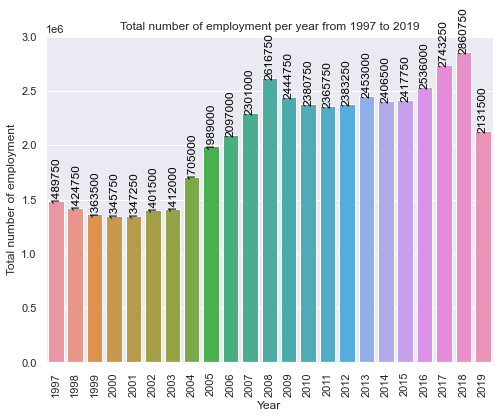

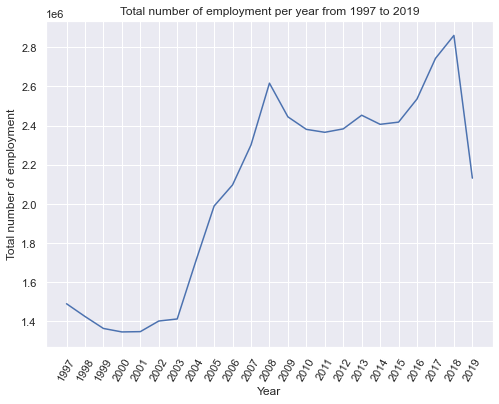

In [48]:
construction_industry = naics_data_specific_years(construction_industry_,"1997","2019")
plot_naics_per_year_barplot(construction_industry,"1997","2019")
plot_naics_per_year_plot(construction_industry,"1997","2019")

Employment in the construction industry started off on a high note (i.e., in *1997*), but declined over the next four years (i.e., from *1998 to *2001*) and experienced a *fifty-four thousand two hundred and fifty (54,250)* increase in employment over the *2001* figure. Employment figures in the industry continued to increase steadily until they rose sharply between 2004 and 2008. Thereafter, the industry began to experience a decline in employment from *2009* to *2011* and a slight increase from *2012* to *2013*, followed by a decline again in *2014* and *2015*. The second strong increase in industry employment occurs from *2016* to *2018* reaching the *maximum industry value in 2018* with total employment of *two million eight hundred and sixty thousand seven hundred and fifty (or 2,860,750)*. However, a decline in employment in the construction industry was observed in *2019*. It is important to note that the early years (*1997-2003*) have the lowest employment in the sector, with the sector employing more people in the periods *2005* and *2008*.

Overall, employment in the construction industry has been volatile with some fluctuations here and there that are not available from the data available in this analysis.

#### 2. How employment in Construction evolved over time, compared to the total employment across all industries?

To find the trend of all other industry as compared to the Construction industry, the data of these industries must first be extracted from the dataset. Below is the first few rows of all other industries excluding the construction industry

In [49]:
without_const_industry = naics_2_code_employ_data[naics_2_code_employ_data.NAICS_code!="23"]
display(without_const_industry.head(10))
without_const_industry.shape

,SYEAR,SMTH,_EMPLOYMENT_,DAY,NAICS_name,NAICS_code
DATE,,,,,,
1997-01-31,1997,1,72000,31,Wholesale trade,41
1997-01-31,1997,1,9750,31,Utilities,22
1997-01-31,1997,1,107000,31,Transportation and warehousing,48-49
1997-01-31,1997,1,224000,31,Retail trade,44-45
1997-01-31,1997,1,50750,31,"Real estate, rental and leasing",53
1997-01-31,1997,1,104500,31,Public administration,91
1997-01-31,1997,1,109750,31,"Professional, scientific and technical services",54
1997-01-31,1997,1,89250,31,Other services (except public administration),81
1997-01-31,1997,1,16750,31,"Mining, quarrying, and oil and gas extraction",21


(5196, 6)

As expected, the data is **5196** rows with **6** columns, which will make it difficult to compare the construction employment with non-construction industry employment (i.e. all other industries). Therefore, the data will be resampled yearly to do the comparison over the *23* years range.

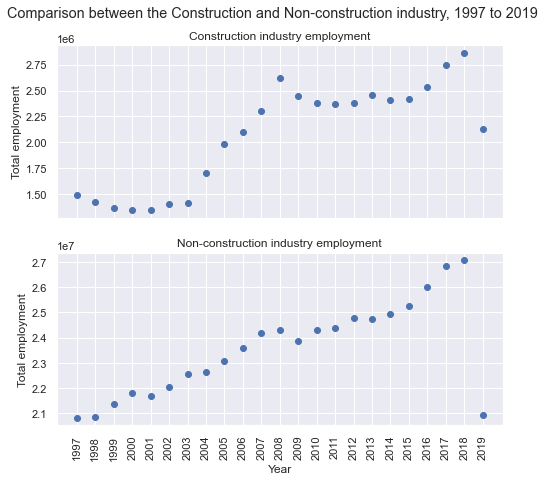

In [50]:
non_construct = naics_data_specific_years(without_const_industry,"1997","2019")
fig,(ax,ax1) = plt.subplots(2,sharex=True,figsize=(8,6))
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.2, wspace=0.2)
fig.suptitle("Comparison between the Construction and Non-construction industry, 1997 to 2019")
ax.scatter(x=years,y=construction_industry._EMPLOYMENT_)
ax.set_title("Construction industry employment")
ax.set_ylabel("Total employment")
#plt.xticks(range(len(years)),years,rotation=90)
ax1.scatter(x=years,y=non_construct._EMPLOYMENT_)
ax1.set_title("Non-construction industry employment")
ax1.set_ylabel("Total employment")
ax1.set_xlabel("Year")
plt.xticks(range(len(years)),years,rotation=90)
plt.show()

While employment in the construction industry began to decline, employment in non-construction industries began to increase steadily from *1997* to *2000*, then declined in *2001*, before continuing to increase, but this time more steadily (from *2002* to *2008*). Over the same period (from *2002* to *2008*), however, the construction industry grew strongly each year to its third highest employment rate over a *23* year period (behind *2017* and *2018*). Although both sectors experienced a decline in employment in 2009, the non-construction sector recovered in subsequent years from *2010* to *2012*, but with a slight decline in *2013* (i.e., *32,500* less than employment in *2012*). However, the decline in construction employment continued through *2011* and appreciated in *2012* and *2013*, with *69,750* more than *2012* employment in *2013*. 
From *2014* to *2018*, employment figures in non-construction industries again increased significantly over the period, peaking in employment in *2018* with a total of *27 million sixty-two thousand two hundred and fifty (27,062,250*). While the value of employment in the non-construction industry continued to increase from 2014 to 2018, employment in the construction industry instead experienced a decline in 2014 and 2015, followed by a continuous and significant increase until 2018, the year of peak employment in the construction industry (i.e. *two million eight hundred and sixty thousand seven hundred and fifty, 2,860,750*). Both sectors experienced a sharp decline in the value of employment in 2019, with the non-construction sector having a higher rate of decline than construction.

The non-construction industries appear to outperform the construction industry in terms of employment opportunities offered over a *23* year period (i.e. *1997-2019*). In addition, the cause of the spike in employment over the years *2016* to *2018* in both sectors and in other sectors is not known, so further research and data analysis is needed to uncover the cause(s) of these spikes.

<ipython-input-51-a4f5d1c513a5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months,rotation=90)


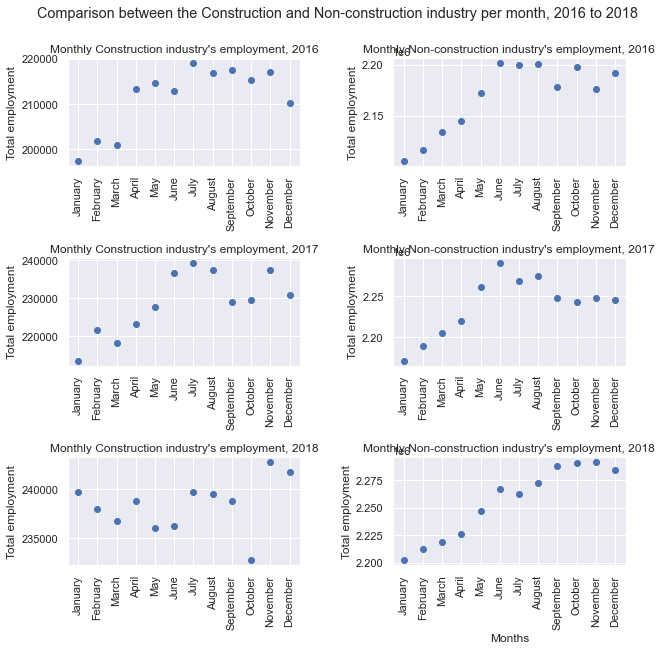

In [51]:
without_const_industry_month_2016 = naics_data_specific_months_year(without_const_industry,"2016-01","2016-12")
without_const_industry_month_2017 = naics_data_specific_months_year(without_const_industry,"2017-01","2017-12")
without_const_industry_month_2018 = naics_data_specific_months_year(without_const_industry,"2018-01","2018-12")
const_industry_month_2016 = naics_data_specific_months_year(construction_industry_,"2016-01","2016-12")
const_industry_month_2017 = naics_data_specific_months_year(construction_industry_,"2017-01","2017-12")
const_industry_month_2018 = naics_data_specific_months_year(construction_industry_,"2018-01","2018-12")
fig,((ax,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2,figsize=(10,8))
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
fig.suptitle("Comparison between the Construction and Non-construction industry per month, 2016 to 2018")
ax.scatter(x=months,y=const_industry_month_2016["_EMPLOYMENT_"])
ax.set_title("Monthly Construction industry's employment, 2016")
ax.set_ylabel("Total employment")
ax1.scatter(x=months,y=without_const_industry_month_2016["_EMPLOYMENT_"])
ax1.set_title("Monthly Non-construction industry's employment, 2016")
ax1.set_ylabel("Total employment")
ax2.scatter(x=months,y=const_industry_month_2017["_EMPLOYMENT_"])
ax2.set_title("Monthly Construction industry's employment, 2017")
ax2.set_ylabel("Total employment")
ax3.scatter(x=months,y=without_const_industry_month_2017["_EMPLOYMENT_"])
ax3.set_title("Monthly Non-construction industry's employment, 2017")
ax3.set_ylabel("Total employment")
ax4.scatter(x=months,y=const_industry_month_2018["_EMPLOYMENT_"])
ax4.set_title("Monthly Construction industry's employment, 2018")
ax4.set_ylabel("Total employment")
ax5.scatter(x=months,y=without_const_industry_month_2018["_EMPLOYMENT_"])
ax5.set_title("Monthly Non-construction industry's employment, 2018")
ax5.set_ylabel("Total employment")
plt.xlabel("Months")
for ax in fig.axes:
    ax.set_xticklabels(months,rotation=90)
plt.show()

#### 3. How the total employment evolve overtime?

In this anlaysis, we want to find out how the total accumulated employment from all sectors evolve over time in respect to *23* year range. As usual we have to aggregate the data for total employment for each year from *1997* to *2019*. A few rows of the data is shown below.

In [52]:
total_employ_97_19 = naics_data_specific_years(naics_2_code_employ_data,"1997","2019")
display(total_employ_97_19.head())
total_employ_97_19.shape

,DATE,_EMPLOYMENT_
0,1997-12-31,22318500
1,1998-12-31,22292250
2,1999-12-31,22724000
3,2000-12-31,23169000
4,2001-12-31,23051000


(23, 2)

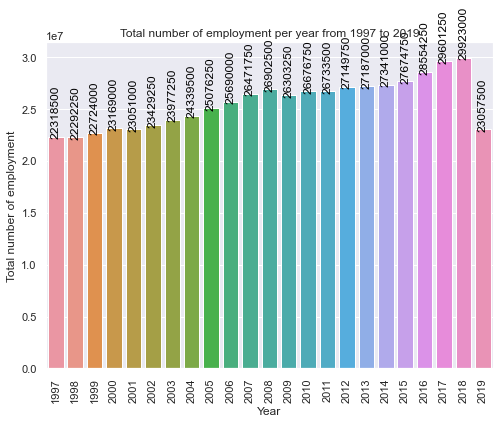

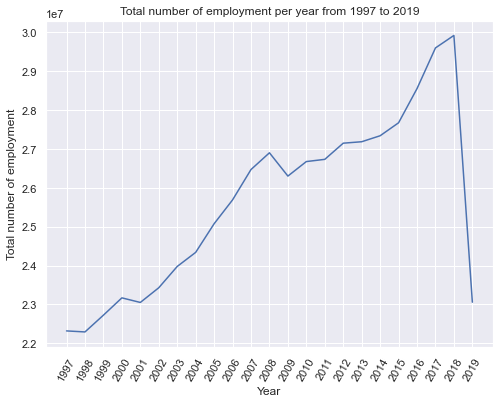

In [54]:
plot_naics_per_year_barplot(total_employ_97_19,"1997","2019")
plot_naics_per_year_plot(total_employ_97_19,"1997","2019")

From the outset, total employment fell in 1998, with *six thousand two hundred and fifty (26,250)* fewer jobs than in 1997. It then began to rise sharply from *2001* to *2008*, but there was a slight decline in 2001 (i.e. *118,000 fewer jobs than in 2000*) when the numbers began to rise from *1999*. After *2008*, *2009* saw a decline of *five hundred and ninety-nine thousand two hundred and fifty, 599,250* jobs from the *2008* figure, followed by a steady increase in total employment until *2015* and a sharp increase from *2015* to *2018*. However, the 2019 employment figure has dropped to a value of 23 million 57 thousand five hundred, 23,057,500*, which is consistent with the data we have analysed, so again the reason for the drop is not readily available for this analysis.
The consistency is not just with the 2019 figures, 2018 was also the year with the highest number of jobs in terms of the data analysed.

#### 4.  What is the peak month (s) for employment overtime?

In this analysis, we would approach it in two ways. First, we will determine the peak month when the data is aggregated on monthly basis for each year and secondly, the peak month when the aggregation is done monthly for the whole period (i.e. 1997-2019).

In [55]:
#Find the total employment for each month within each year (i.e. Jan 1997, Feb 1997 ...)
month_employ = naics_2_code_employ_data.loc["1997-01":"2019-12"].resample("M").sum()
#Sorted the data in decsending order and display the first 10 rows
month_employ_sorted = month_employ.sort_values(by="_EMPLOYMENT_",ascending=False)
display(month_employ_sorted.head(10),month_employ_sorted.tail(10))

,_EMPLOYMENT_
DATE,
2019-06-30,2612500
2019-07-31,2595000
2019-05-31,2590750
2019-08-31,2580750
2019-09-30,2558750
2019-04-30,2549750
2019-03-31,2540500
2018-11-30,2534000
2017-06-30,2526500


,_EMPLOYMENT_
DATE,
1997-04-30,1827750
1998-03-31,1820500
1997-03-31,1815250
1998-02-28,1813750
1998-01-31,1809000
1997-02-28,1808000
1997-01-31,1802250
2019-10-31,0
2019-11-30,0


The first *seven (7)* months with highest number of employment figures were in *2019* which all this while has been the year with the lowest number of employment. This seems strange, however, further analysis revealed that the last *3 months* of *2019* (i.e. *October-December*) recorded *zero (0)* number of employment which accounts for it been the year with least number of employment.

In [56]:
#Find the month with the maximum number of employment per each year 
display(month_employ[month_employ._EMPLOYMENT_==month_employ._EMPLOYMENT_.max()])

,_EMPLOYMENT_
DATE,
2019-06-30,2612500


The month employing the highest number of people from 1997 to 2019 was **June 2019** with **two million sixty hundred and twelve thousand five hundred** persons employed.

To shed more light on the above analysis, a comparison is done between the years with the highest number and the lowest number of employment, *2018* and *2019* respectively.

<ipython-input-57-87200f084693>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months,rotation=90)


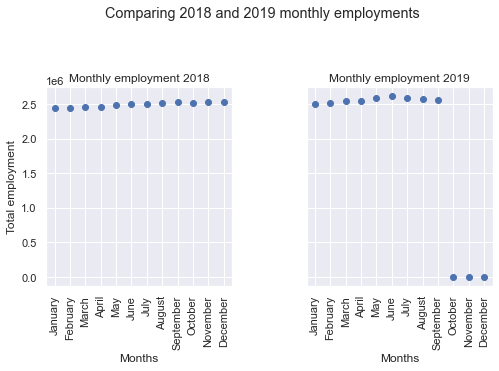

In [57]:
#Save the number of employment per each for 2018
naics_industries_monthly_2018 = naics_data_specific_months_year(naics_2_code_employ_data,"2018-01","2018-12")
#Save the number of employment per each for 2019
naics_industries_monthly_2019 = naics_data_specific_months_year(naics_2_code_employ_data,"2019-01","2019-12")
#Plot a graph of the monthly employment for both year (2018 and 2019)
fig,(ax,ax1) = plt.subplots(1,2,figsize=(8,4),sharey=True)
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.5, wspace=0.4)
fig.suptitle("Comparing 2018 and 2019 monthly employments")
ax.scatter(x=months,y=naics_industries_monthly_2018["_EMPLOYMENT_"])
ax.set_title("Monthly employment 2018")
ax.set_ylabel("Total employment")
ax1.scatter(x=months,y=naics_industries_monthly_2019["_EMPLOYMENT_"])
ax1.set_title("Monthly employment 2019")
for ax in fig.axes:
    ax.set_xticklabels(months,rotation=90)
    ax.set_xlabel("Months")
plt.show()

In [58]:
#Find the month with the maximum number of people employed across all industries for 2018
peak_month_2018 = naics_industries_monthly_2018[naics_industries_monthly_2018._EMPLOYMENT_==naics_industries_monthly_2018._EMPLOYMENT_.max()]
#Find the month with the maximum number of people employed across all industries for 2019
peak_month_2019 = naics_industries_monthly_2019[naics_industries_monthly_2019._EMPLOYMENT_==naics_industries_monthly_2019._EMPLOYMENT_.max()]
print(peak_month_2018)
print(peak_month_2019)

            _EMPLOYMENT_
DATE                    
2018-11-30       2534000
            _EMPLOYMENT_
DATE                    
2019-06-30       2612500


The second aspect of the analysis is below, the aggregation as stated earlier is done on monthly base over the entire period not for each year.

In [59]:
#Empty dictionary to accumulate the values for each month
month_employ_dict = {}
#Iterate through the dataset and aggregate the values for each month for the entire period
for index,row in month_employ.iterrows():
    mths = index.month
    value = month_employ.loc[index,"_EMPLOYMENT_"]
    if mths in month_employ_dict:
        month_employ_dict[mths]+=value
    else:
        month_employ_dict[mths]=value
#Sort the dictionary in descending order
month_employ_sorted = sorted(month_employ_dict.items(),key=lambda x:x[1],reverse=True)
#Empty list to store the values of the sorted dictionary for plotting
month_values = []
#Iterate through the dictionary keys and append its value to a list
for index,value in month_employ_dict.items():
    month_values.append(value)

In [60]:
display(month_employ_sorted)

[(8, 50548250),
 (6, 50504750),
 (7, 50456500),
 (9, 50193500),
 (5, 49937000),
 (4, 49190000),
 (3, 49050500),
 (2, 48770000),
 (1, 48533250),
 (10, 47628500),
 (11, 47456000),
 (12, 47375000)]

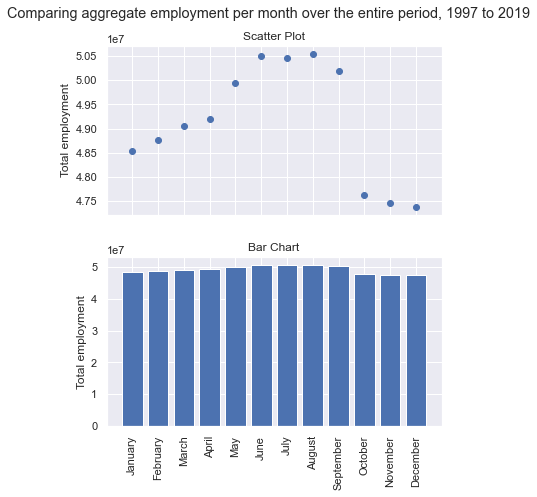

In [61]:
#Create a subplot figure with two rows to compare the monthly employment figure for the 
#entire period, 1997 to 2019
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,6),sharex=True)
#Adjust the subplot for spacing and readability
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.25, wspace=0.4)
#Set the main title for the subplot
fig.suptitle("Comparing aggregate employment per month over the entire period, 1997 to 2019")
#Plot the first graph
ax1.scatter(x=months,y=month_values)
#Set the title for the first graph
ax1.set_title("Scatter Plot")
#Set the y-axis label for the first graph
ax1.set_ylabel("Total employment")
#Plot the second graph
ax2.bar(months,month_values)
#Set the title for the second graph
ax2.set_title("Bar Chart")
#Set the y-axis label for the first graph
ax2.set_ylabel("Total employment")
#Set the x-axis ticks for the figure
plt.xticks(range(len(months)),months,rotation=90)
#Display the figure
plt.show()

Although *June 2019* was the month employing the most people in terms of monthly employment for each year from 1997 to 2019, however, if we cumulate the employment of each month over the *23 year* period, August* is the month with the largest number of jobs employing a total of *fifty million, five hundred and forty-eight thousand, two hundred and fifty (i.e. 50,548,250)*, closely followed by June with *50,504,750*, July, *50,456,500* and September with *50,193,500* in that order.
It is clear that people are more employed in the second half of each year, particularly from June to September, as the above figures and the analysis of the monthly employment figures for each year show.

#### 5. What is the 2-digit NAICS industry employing most people?

The analysis to answer the above question would be done on the NAICS 2-digit industries. Aggregation of the number of employment in each industry is done and the result sorted descending and a graph is plotted.

In [62]:
#Group the industry by name and code and find its summation of the employment column
employ_by_industry = naics_2_code_employ_data.groupby(["NAICS_name","NAICS_code"])._EMPLOYMENT_.sum().reset_index()
#Sort the employment column from the highest to the lowest
employ_by_industry = employ_by_industry.sort_values(by="_EMPLOYMENT_",ascending=False).reset_index(drop=True)
#Display the first and last 5 rows of the results
display(employ_by_industry.head(),employ_by_industry.tail())

,NAICS_name,NAICS_code,_EMPLOYMENT_
0,Retail trade,44-45,71565000
1,Health care and social assistance,62,66872000
2,Manufacturing,31-33,49336250
3,Construction,23,47616500
4,Accommodation and food services,72,46411000


,NAICS_name,NAICS_code,_EMPLOYMENT_
15,"Agriculture, forestry, fishing and hunting",11,14753250
16,"Real estate, rental and leasing",53,12959250
17,"Mining, quarrying, and oil and gas extraction",21,5678750
18,Utilities,22,3130750
19,Management of companies and enterprises,55,78500


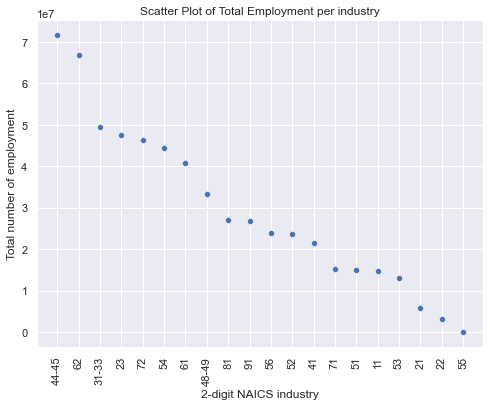

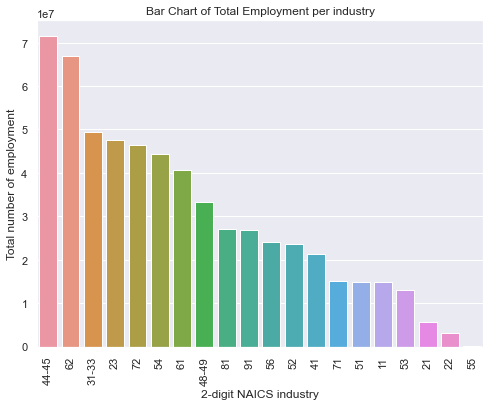

In [63]:
#Plot a scatter plot of 2-digit NAICS industries against the number of employment offerred 
sns.scatterplot(x="NAICS_code",y="_EMPLOYMENT_",data=employ_by_industry)
#Set the title of the scatter plot
plt.title("Scatter Plot of Total Employment per industry")
#Set the y-axis label of the scatter plot
plt.ylabel("Total number of employment")
#Set the x-axis label of the scatter plot
plt.xlabel("2-digit NAICS industry")
#Rotation the x-axis ticks of the scatterplot
plt.xticks(rotation=90)
#Display the graph
plt.show()
g = sns.barplot(x="NAICS_code",y="_EMPLOYMENT_",data=employ_by_industry)
#Set the title of the Bar chart
plt.title("Bar Chart of Total Employment per industry")
#Set the y-axis label of the Bar chart
plt.ylabel("Total number of employment")
#Set the x-axis label of the Bar chart
plt.xlabel("2-digit NAICS industry")
#Rotation the x-axis ticks of the Bar chart
plt.xticks(rotation=90)
#Display the graph
plt.show()

Of the total *five hundred and eighty-nine million, six hundred and forty-three thousand, two hundred and fifty (589,643,250)*, *Retail Trade (code 44-45**) employed a total of *71 million five hundred and sixty-five thousand (71,565,000)*, or *12.14%*, followed by *Health and Social Assistance* (62) with *66,872,000* jobs, *Manufacturing*, *Construction* and *Accommodation and Food Services*, in that order, for the five most employable industries.

Further analysis of the two best employing industries (i.e. Retail Trade and Healthcare and social assistance) on yearly and monthly basis for entire period is below.

In [64]:
industry_by_code_select(naics_2_code_employ_data,"44-45")
retail_trade_yearly = naics_data_specific_years(industry_by_code_select(naics_2_code_employ_data,"44-45"),"1997","2019")
health_yearly = naics_data_specific_years(industry_by_code_select(naics_2_code_employ_data,"62"),"1997","2019")

<ipython-input-65-70ae4a141a5f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years,rotation=90)


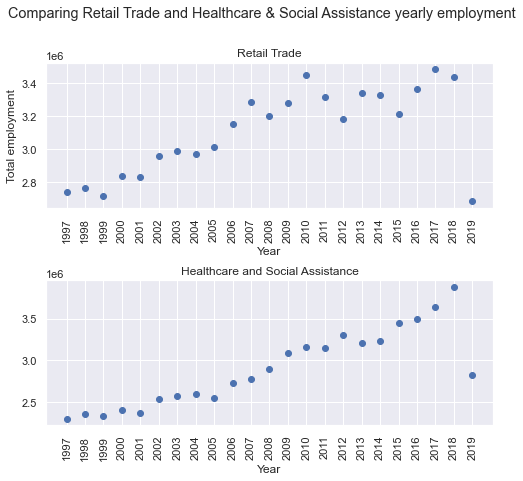

In [65]:
fig,(ax,ax1) = plt.subplots(2,figsize=(8,6))
plt.subplots_adjust(top = 0.85, bottom=0.01, hspace=0.5, wspace=0.4)
fig.suptitle("Comparing Retail Trade and Healthcare & Social Assistance yearly employment")
ax.scatter(x=years,y=retail_trade_yearly["_EMPLOYMENT_"])
ax.set_title("Retail Trade")
ax.set_ylabel("Total employment")
ax1.scatter(x=years,y=health_yearly["_EMPLOYMENT_"])
ax1.set_title("Healthcare and Social Assistance")
for ax in fig.axes:
    ax.set_xticklabels(years,rotation=90)
    ax.set_xlabel("Year")
plt.show()

In [66]:
retail = industry_by_code_select(naics_2_code_employ_data,"44-45")
health = industry_by_code_select(naics_2_code_employ_data,"62")
retail.loc["1997-01":"2019-12"].resample("M").sum().head()
health.loc["1997-01":"2019-12"].resample("M").sum().head()
#Empty dictionary to accumulate the values for each month
retail_employ_monthly_dict = {}
#Iterate through the dataset and aggregate the values for each month for the entire period
for index,row in retail.iterrows():
    mths = index.month
    value = retail.loc[index,"_EMPLOYMENT_"]
    if mths in retail_employ_monthly_dict:
        retail_employ_monthly_dict[mths]+=value
    else:
        retail_employ_monthly_dict[mths]=value
#Sort the dictionary in descending order
retail_month_employ_sorted = sorted(retail_employ_monthly_dict.items(),key=lambda x:x[1],reverse=True)
#Empty list to store the values of the sorted dictionary for plotting
retail_month_values = []
#Iterate through the dictionary keys and append its value to a list
for index,value in retail_employ_monthly_dict.items():
    retail_month_values.append(value)
print(retail_employ_monthly_dict)

{1: 5917250, 2: 5894500, 3: 5936000, 4: 5941000, 5: 6046500, 6: 6087500, 7: 6117000, 8: 6112750, 9: 6052250, 10: 5752250, 11: 5838000, 12: 5870000}


In [67]:
#Empty dictionary to accumulate the values for each month
health_employ_monthly_dict = {}
#Iterate through the dataset and aggregate the values for each month for the entire period
for index,row in health.iterrows():
    mths = index.month
    value = health.loc[index,"_EMPLOYMENT_"]
    if mths in health_employ_monthly_dict:
        health_employ_monthly_dict[mths]+=value
    else:
        health_employ_monthly_dict[mths]=value
#Sort the dictionary in descending order
health_month_employ_sorted = sorted(health_employ_monthly_dict.items(),key=lambda x:x[1],reverse=True)
#Empty list to store the values of the sorted dictionary for plotting
health_month_values = []
#Iterate through the dictionary keys and append its value to a list
for index,value in health_employ_monthly_dict.items():
    health_month_values.append(value)
print(health_employ_monthly_dict)

{1: 5533000, 2: 5558500, 3: 5594750, 4: 5604500, 5: 5617750, 6: 5672750, 7: 5680750, 8: 5697000, 9: 5695250, 10: 5409000, 11: 5398500, 12: 5410250}


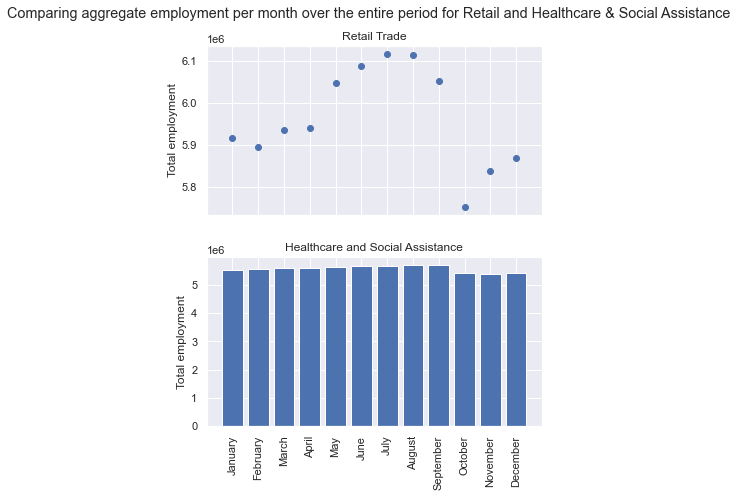

In [68]:
#Create a subplot figure with two rows to compare the monthly employment figure for the 
#entire period, 1997 to 2019
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,6),sharex=True)
#Adjust the subplot for spacing and readability
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.25, wspace=0.4)
#Set the main title for the subplot
fig.suptitle("Comparing aggregate employment per month over the entire period for Retail and Healthcare & Social Assistance")
#Plot the first graph
ax1.scatter(x=months,y=retail_month_values)
#Set the title for the first graph
ax1.set_title("Retail Trade")
#Set the y-axis label for the first graph
ax1.set_ylabel("Total employment")
#Plot the second graph
ax2.bar(months,health_month_values)
#Set the title for the second graph
ax2.set_title("Healthcare and Social Assistance")
#Set the y-axis label for the first graph
ax2.set_ylabel("Total employment")
#Set the x-axis ticks for the figure
plt.xticks(range(len(months)),months,rotation=90)
#Display the figure
plt.show()

Critically looking at the two graphs confirms the earlier state assumption that more people are employed during the second half of the year especially from *May* to *September* with the reasons yet known and further studies and research on the Canadian industires would be able to point out such reasons.

In conclusion, it was observed that the total employment across the 3-digit NAICS industries were the same but that of the 4-digit NAICS industries fall short of two hundred and fifty (250).